<h2>Library Import

In [1]:
# Standard library imports
import os

# Data manipulation and preprocessing libraries
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder, RobustScaler, StandardScaler
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Deep learning libraries
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Model evaluation and metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

# Explainability libraries
import lime
import shap
from lime.lime_tabular import LimeTabularExplainer

#Permutation Importnace
from sklearn.metrics import accuracy_score
import copy


In [2]:
# Load dataset
df = pd.read_csv('C:/Users/madus/Documents/healthcare-dataset-stroke-data.csv')

In [3]:
df.describe

<bound method NDFrame.describe of          id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urba

<h2>EDA - EXPLORATORY DATA ANALYSIS

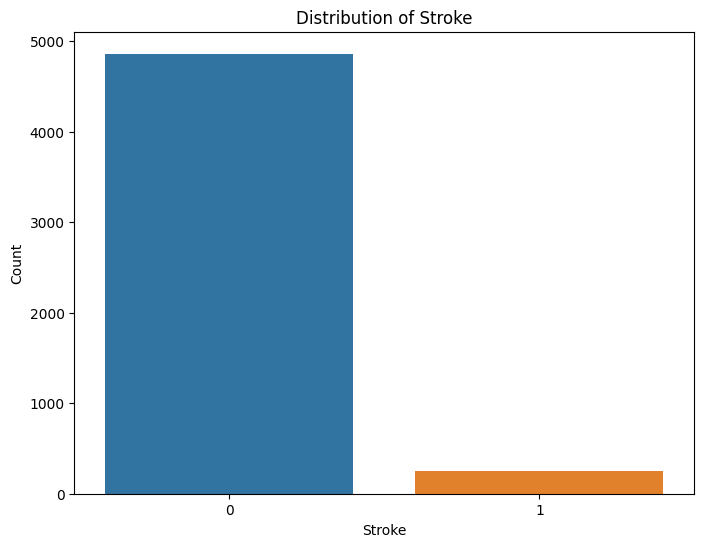

In [4]:
# Univariate Analysis / variate Analysis / ltivariate Analysis

plt.figure(figsize=(8, 6))
sns.countplot(x='stroke', data=df)
plt.title('Distribution of Stroke')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.show()

The target variable 'stroke' is highly imbalanced with a lot more instances of class 0 (no stroke) than class 1 (stroke). This is an important observation and it can be affect the for deep learning models and evaluation metric

<h3>Categorical Variables Distribution

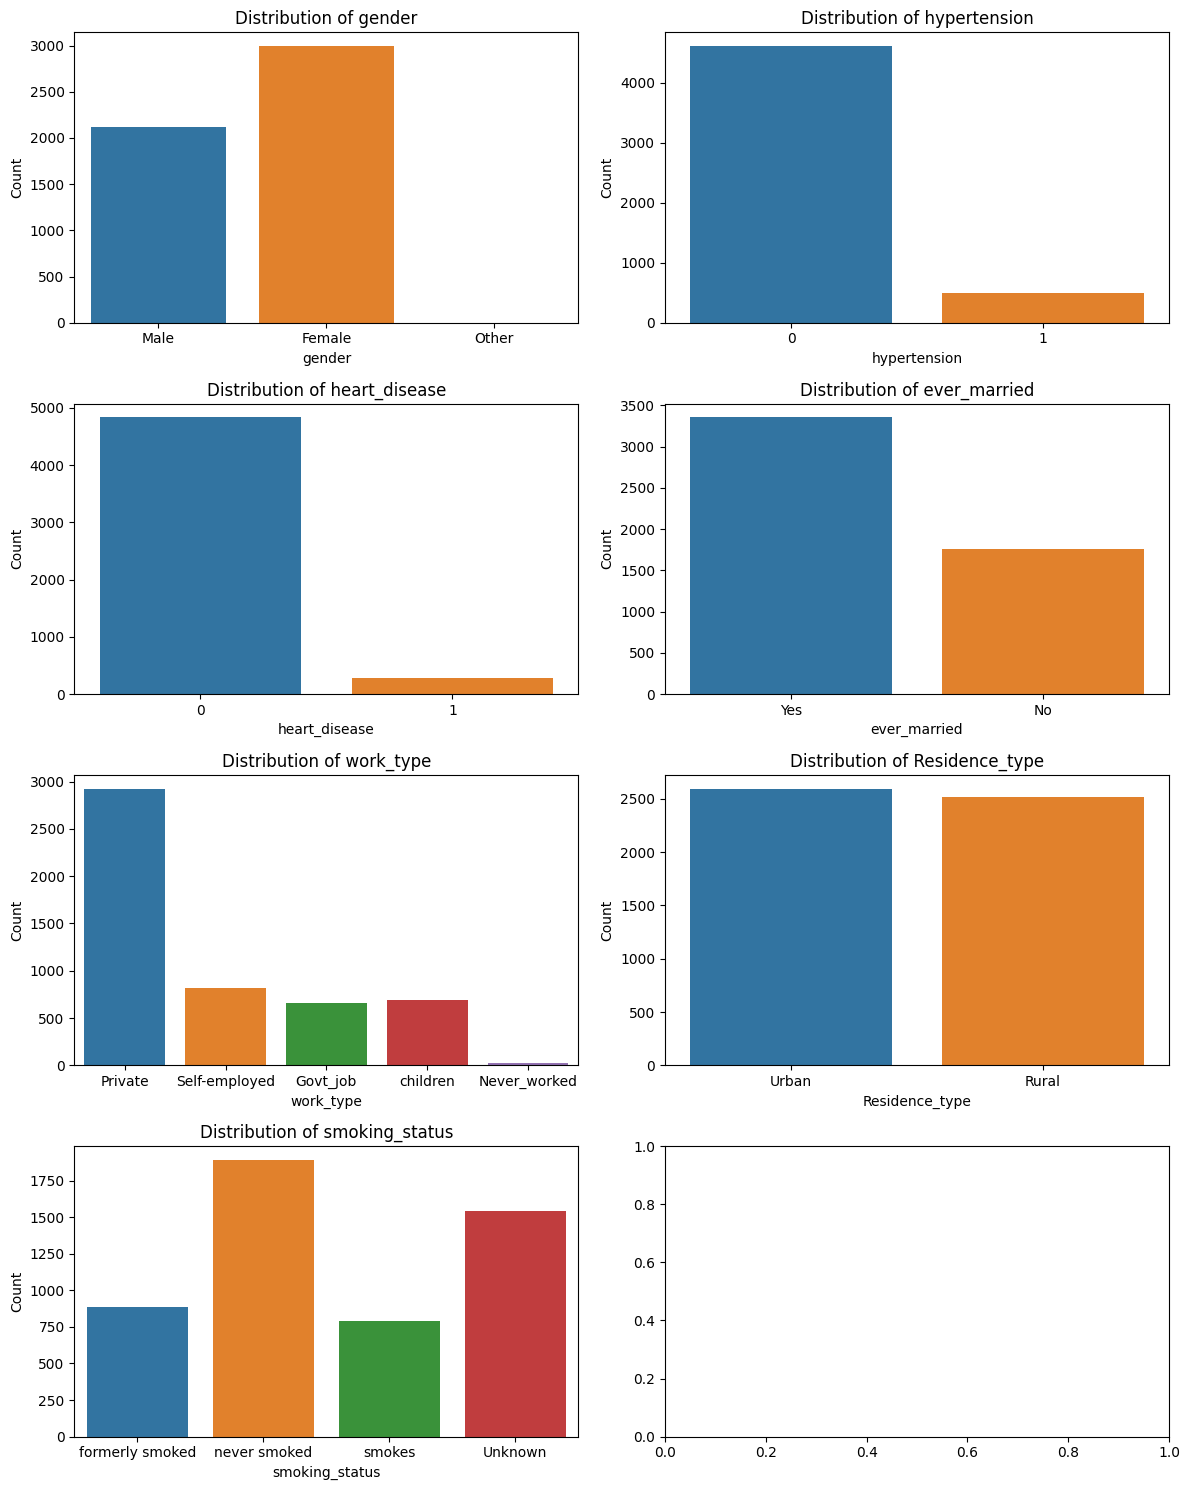

In [5]:
# List of categorical variables
categorical_variables = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Plotting the bar plots with smaller graphs
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(12, 15))

# Iterate through each categorical variable and plot the bar plot
for i, var in enumerate(categorical_variables):
    row = i // 2
    col = i % 2
    sns.countplot(x=var, data=df, ax=axs[row, col])
    axs[row, col].set_title(f'Distribution of {var}')
    axs[row, col].set_xlabel(var)
    axs[row, col].set_ylabel('Count')

plt.tight_layout()
plt.show()



<h3>distribution of the continuous variables

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


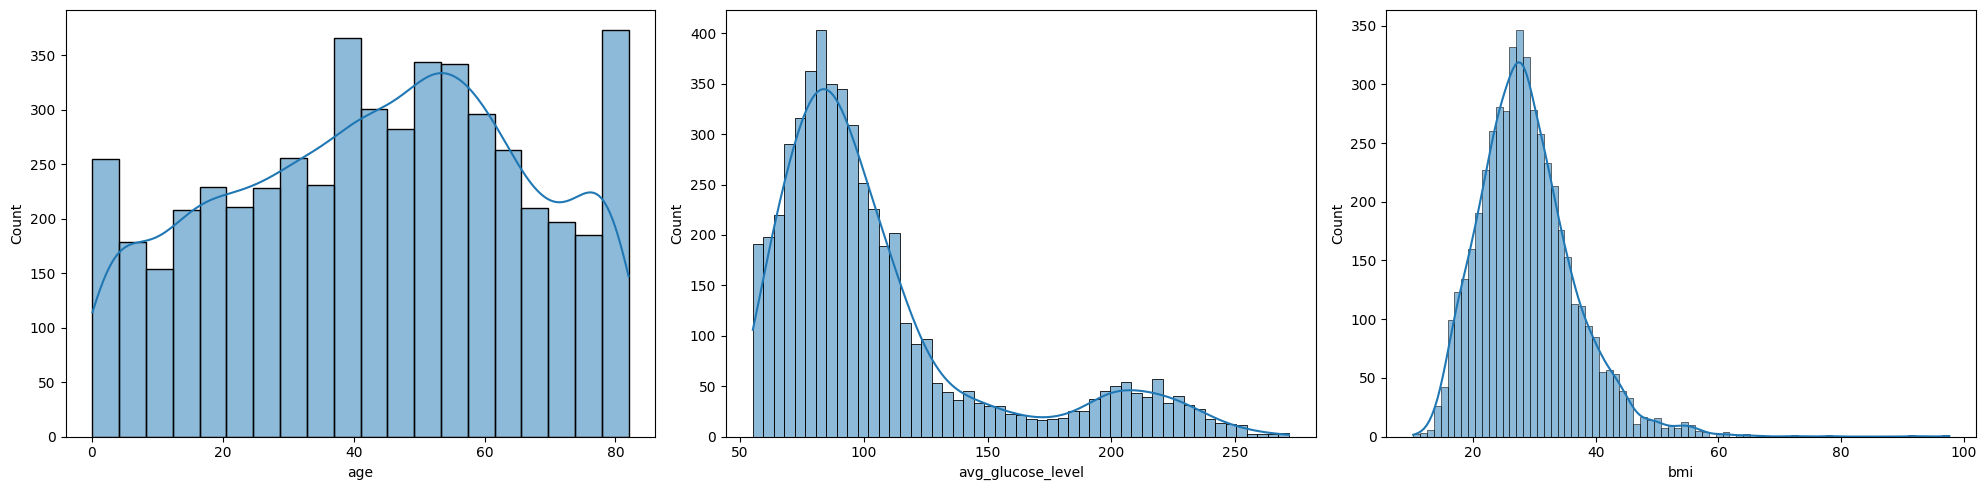

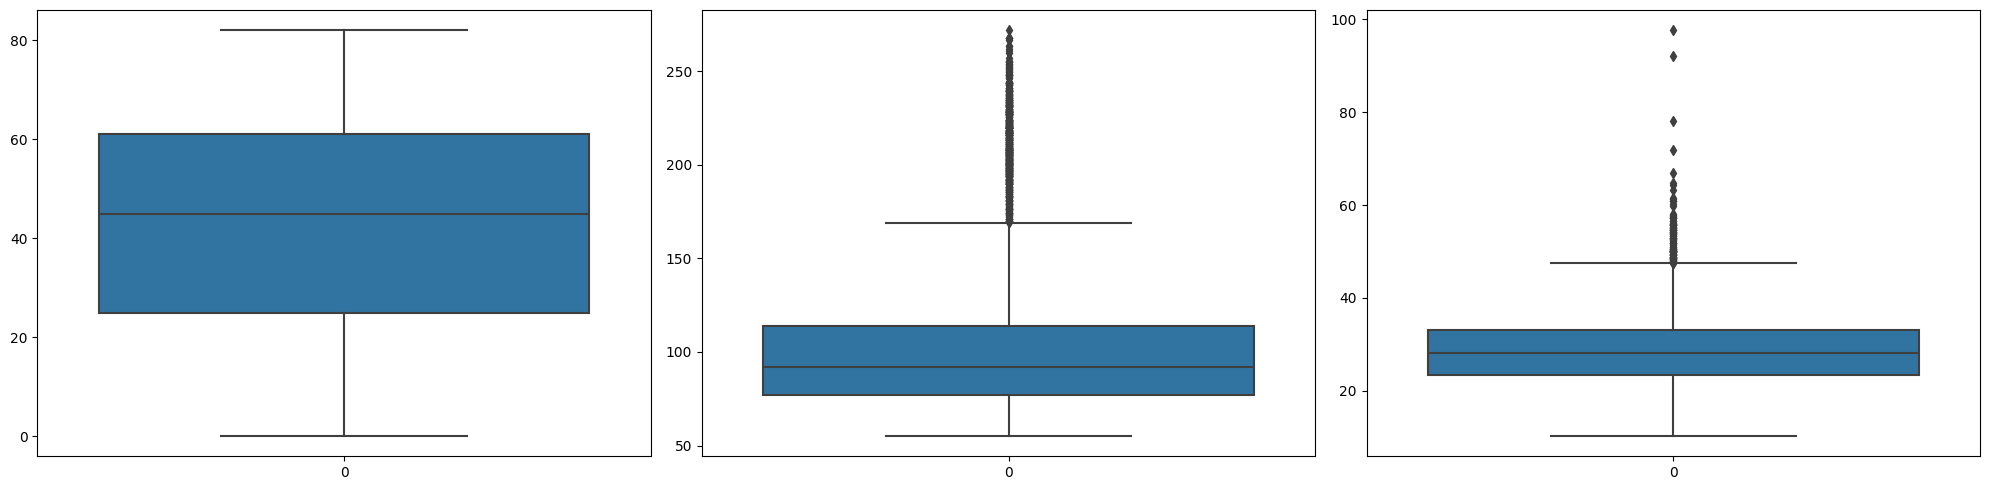

In [6]:
# List of continuous variables
continuous_variables = ['age', 'avg_glucose_level', 'bmi']

# Plot the histograms for continuous variables
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

for var, subplot in zip(continuous_variables, axs.flatten()):
    sns.histplot(df[var], kde=True, ax=subplot)

plt.tight_layout()
plt.show()

# Plot the boxplots for continuous variables
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

for var, subplot in zip(continuous_variables, axs.flatten()):
    sns.boxplot(df[var], ax=subplot)

plt.tight_layout()
plt.show()


age: The age of the patients varies from young to old, with the majority of patients being in the range of 40-80 years. 
bmi: The majority of patients have a BMI in the range of 20-40, which is considered normal to overweight. There are some outliers with extremely high BMI values.
avg_glucose_level: Most patients have an average glucose level in the range of 50-125, but there are also many patients with higher levels. The distribution is right-skewed

<H2>
Data Preprocessing 

In [8]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [9]:
# 1- handling missing values - Impute missing values for 'bmi' with KNN Imputer

imputer = KNNImputer(n_neighbors=5, weights='uniform')
df['bmi'] = imputer.fit_transform(df[['bmi']])

In [10]:
# Count the number of "unknown" values in the 'smoking_status' column
unknown_count = df[df['smoking_status'] == 'Unknown'].shape[0]
print("Number of 'unknown' records in 'smoking_status' column:", unknown_count)


Number of 'unknown' records in 'smoking_status' column: 1544


In [11]:
# For categorical features  'smoking_status', create a new category for missing values:

# Step 1: Create a new category 'Unknown' for missing values in 'smoking_status'
df['smoking_status'].fillna('Unknown', inplace=True)

# Step 2: Replace 'Unknown' with a new category 'Missing'
df['smoking_status'].replace('Unknown', 'Missing', inplace=True)


In [12]:
#Outliers remove from gender
df['gender'].value_counts()
df.drop(df[df.gender == 'Other'].index,inplace=True)
df.reset_index(drop=True,inplace=True)
#df.gender = df.gender.map({'Male':0,'Female':1})

In [13]:
df

id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5104  18234  Female  80.0             1              0          Yes   
5105  44873  Female  81.0             0              0          Yes   
5106  19723  Female  35.0             0              0          Yes   
5107  37544    Male  51.0             0              0          Yes   
5108  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level        bmi  \
0           Private          Urban             228.69  36.600000   
1     Self-employed          Rural             202.21  28.893237   
2           Private          Rural             105.92  32.500000   
3           Private          Urban             171.23  34.400000   
4     Self-employed          Rural             174.12  24.000000   
...             ...            ...                ...        ...   
5104        Private          Urban              83.75  28.893237   
5105  Self-employed          Urban             125.20  40.000000   
5106  Self-employed          Rural              82.99  30.600000   
5107        Private          Rural             166.29  25.600000   
5108       Govt_job          Urban              85.28  26.200000   

       smoking_status  stroke  
0     formerly smoked       1  
1        never smoked       1  
2        never smoked       1  
3              smokes       1  
4        never smoked       1  
...               ...     ...  
5104     never smoked       0  
5105     never smoked       0  
5106     never smoked       0  
5107  formerly smoked       0  
5108          Missing       0  

[5109 rows x 12 columns]

<h3>correlation matrix - Each variable correlation with the target variable stroke

In [15]:
dff = df.copy()
dff

id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5104  18234  Female  80.0             1              0          Yes   
5105  44873  Female  81.0             0              0          Yes   
5106  19723  Female  35.0             0              0          Yes   
5107  37544    Male  51.0             0              0          Yes   
5108  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level        bmi  \
0           Private          Urban             228.69  36.600000   
1     Self-employed          Rural             202.21  28.893237   
2           Private          Rural             105.92  32.500000   
3           Private          Urban             171.23  34.400000   
4     Self-employed          Rural             174.12  24.000000   
...             ...            ...                ...        ...   
5104        Private          Urban              83.75  28.893237   
5105  Self-employed          Urban             125.20  40.000000   
5106  Self-employed          Rural              82.99  30.600000   
5107        Private          Rural             166.29  25.600000   
5108       Govt_job          Urban              85.28  26.200000   

       smoking_status  stroke  
0     formerly smoked       1  
1        never smoked       1  
2        never smoked       1  
3              smokes       1  
4        never smoked       1  
...               ...     ...  
5104     never smoked       0  
5105     never smoked       0  
5106     never smoked       0  
5107  formerly smoked       0  
5108          Missing       0  

[5109 rows x 12 columns]

In [16]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for column in ['gender',
       'ever_married','work_type',
       'Residence_type','smoking_status']:
    dff[column] = label_encoder.fit_transform(dff[column])



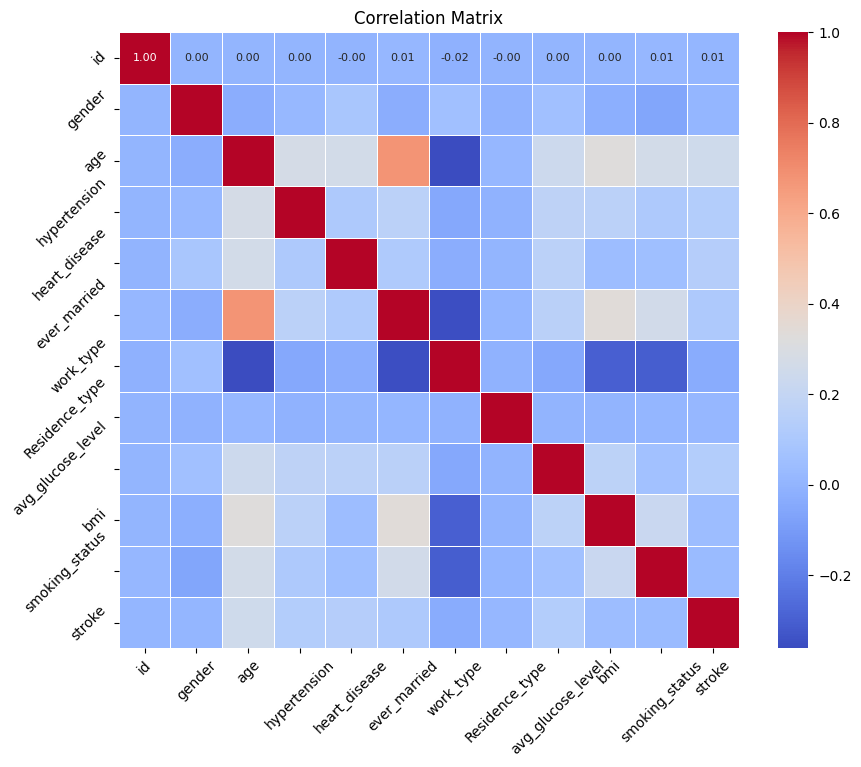

In [17]:

# Compute the correlation matrix
corr_matrix = dff.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"fontsize": 8})

# Set the title of the plot
plt.title('Correlation Matrix')

# Rotate the tick labels for better visibility
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Show plot
plt.show()

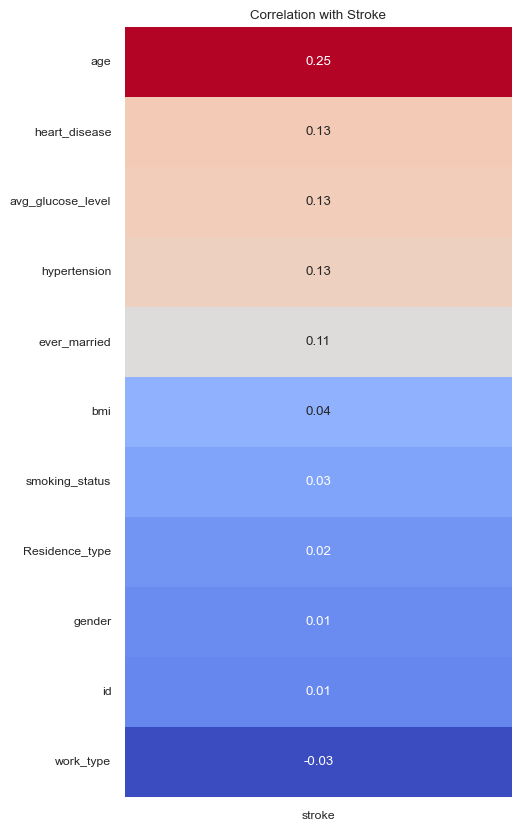

In [18]:
corr_one_hot = corr_matrix['stroke'].drop('stroke')

# Sort correlation values in descending order
corr_sorted_one_hot = corr_one_hot.sort_values(ascending=False)

# Plot a heatmap of the correlations with the target column
plt.figure(figsize=(5, 10))
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(corr_sorted_one_hot.to_frame(), cmap="coolwarm", annot=True, fmt='.2f', cbar=False)
plt.title('Correlation with Stroke')
plt.show()

In [21]:
new_df = df.copy()
new_df

id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5104  18234  Female  80.0             1              0          Yes   
5105  44873  Female  81.0             0              0          Yes   
5106  19723  Female  35.0             0              0          Yes   
5107  37544    Male  51.0             0              0          Yes   
5108  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level        bmi  \
0           Private          Urban             228.69  36.600000   
1     Self-employed          Rural             202.21  28.893237   
2           Private          Rural             105.92  32.500000   
3           Private          Urban             171.23  34.400000   
4     Self-employed          Rural             174.12  24.000000   
...             ...            ...                ...        ...   
5104        Private          Urban              83.75  28.893237   
5105  Self-employed          Urban             125.20  40.000000   
5106  Self-employed          Rural              82.99  30.600000   
5107        Private          Rural             166.29  25.600000   
5108       Govt_job          Urban              85.28  26.200000   

       smoking_status  stroke  
0     formerly smoked       1  
1        never smoked       1  
2        never smoked       1  
3              smokes       1  
4        never smoked       1  
...               ...     ...  
5104     never smoked       0  
5105     never smoked       0  
5106     never smoked       0  
5107  formerly smoked       0  
5108          Missing       0  

[5109 rows x 12 columns]

<h3>Encoding - Onehot encoding /Label encoding

In [22]:
one_hot_cols = ['gender']

# One-hot encoding
new_df = pd.get_dummies(new_df, columns=one_hot_cols)

# Display the encoded DataFrame
print("DataFrame after encoding:")
print(new_df.head())

DataFrame after encoding:
      id   age  hypertension  heart_disease ever_married      work_type  \
0   9046  67.0             0              1          Yes        Private   
1  51676  61.0             0              0          Yes  Self-employed   
2  31112  80.0             0              1          Yes        Private   
3  60182  49.0             0              0          Yes        Private   
4   1665  79.0             1              0          Yes  Self-employed   

  Residence_type  avg_glucose_level        bmi   smoking_status  stroke  \
0          Urban             228.69  36.600000  formerly smoked       1   
1          Rural             202.21  28.893237     never smoked       1   
2          Rural             105.92  32.500000     never smoked       1   
3          Urban             171.23  34.400000           smokes       1   
4          Rural             174.12  24.000000     never smoked       1   

   gender_Female  gender_Male  
0          False         True  
1       

In [23]:
print(new_df.columns)

Index(['id', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'gender_Female', 'gender_Male'],
      dtype='object')


In [24]:
processed_df=new_df.copy()
processed_df

id   age  hypertension  heart_disease ever_married      work_type  \
0      9046  67.0             0              1          Yes        Private   
1     51676  61.0             0              0          Yes  Self-employed   
2     31112  80.0             0              1          Yes        Private   
3     60182  49.0             0              0          Yes        Private   
4      1665  79.0             1              0          Yes  Self-employed   
...     ...   ...           ...            ...          ...            ...   
5104  18234  80.0             1              0          Yes        Private   
5105  44873  81.0             0              0          Yes  Self-employed   
5106  19723  35.0             0              0          Yes  Self-employed   
5107  37544  51.0             0              0          Yes        Private   
5108  44679  44.0             0              0          Yes       Govt_job   

     Residence_type  avg_glucose_level        bmi   smoking_status  stroke  \
0             Urban             228.69  36.600000  formerly smoked       1   
1             Rural             202.21  28.893237     never smoked       1   
2             Rural             105.92  32.500000     never smoked       1   
3             Urban             171.23  34.400000           smokes       1   
4             Rural             174.12  24.000000     never smoked       1   
...             ...                ...        ...              ...     ...   
5104          Urban              83.75  28.893237     never smoked       0   
5105          Urban             125.20  40.000000     never smoked       0   
5106          Rural              82.99  30.600000     never smoked       0   
5107          Rural             166.29  25.600000  formerly smoked       0   
5108          Urban              85.28  26.200000          Missing       0   

      gender_Female  gender_Male  
0             False         True  
1              True        False  
2             False         True  
3              True        False  
4              True        False  
...             ...          ...  
5104           True        False  
5105           True        False  
5106           True        False  
5107          False         True  
5108           True        False  

[5109 rows x 13 columns]

In [25]:
print(processed_df.columns)

Index(['id', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'gender_Female', 'gender_Male'],
      dtype='object')


In [26]:
processed_df.head

<bound method NDFrame.head of          id   age  hypertension  heart_disease ever_married      work_type  \
0      9046  67.0             0              1          Yes        Private   
1     51676  61.0             0              0          Yes  Self-employed   
2     31112  80.0             0              1          Yes        Private   
3     60182  49.0             0              0          Yes        Private   
4      1665  79.0             1              0          Yes  Self-employed   
...     ...   ...           ...            ...          ...            ...   
5104  18234  80.0             1              0          Yes        Private   
5105  44873  81.0             0              0          Yes  Self-employed   
5106  19723  35.0             0              0          Yes  Self-employed   
5107  37544  51.0             0              0          Yes        Private   
5108  44679  44.0             0              0          Yes       Govt_job   

     Residence_type  avg_glucose_

In [27]:
#Label encoding is used to convert categorical labels into numerical values.
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for column in ['ever_married',
       'Residence_type','smoking_status',
       'bmi', 'avg_glucose_level',
       'gender_Female', 'gender_Male','work_type']:
    processed_df[column] = label_encoder.fit_transform(processed_df[column])




In [28]:
processed_df

id   age  hypertension  heart_disease  ever_married  work_type  \
0      9046  67.0             0              1             1          2   
1     51676  61.0             0              0             1          3   
2     31112  80.0             0              1             1          2   
3     60182  49.0             0              0             1          2   
4      1665  79.0             1              0             1          3   
...     ...   ...           ...            ...           ...        ...   
5104  18234  80.0             1              0             1          2   
5105  44873  81.0             0              0             1          3   
5106  19723  35.0             0              0             1          3   
5107  37544  51.0             0              0             1          2   
5108  44679  44.0             0              0             1          0   

      Residence_type  avg_glucose_level  bmi  smoking_status  stroke  \
0                  1               3849  240               1       1   
1                  0               3587  162               2       1   
2                  0               2483  199               2       1   
3                  1               3384  218               3       1   
4                  0               3393  113               2       1   
...              ...                ...  ...             ...     ...   
5104               1               1360  162               2       0   
5105               1               3030  274               2       0   
5106               0               1314  180               2       0   
5107               0               3362  129               1       0   
5108               1               1454  135               0       0   

      gender_Female  gender_Male  
0                 0            1  
1                 1            0  
2                 0            1  
3                 1            0  
4                 1            0  
...             ...          ...  
5104              1            0  
5105              1            0  
5106              1            0  
5107              0            1  
5108              1            0  

[5109 rows x 13 columns]

<h2>Standard Scaler


In [29]:
#Standard scaling is used to transform numerical features to have a mean of 0 and a standard deviation of 1.

# Initialize StandardScaler
scaler = StandardScaler()

# Define the numerical features to be normalized
numerical_features = ['age','avg_glucose_level','bmi']

# Apply standard scaling to the numerical features
processed_df[numerical_features] = scaler.fit_transform(processed_df[numerical_features])

In [31]:
processed_df_new = processed_df.copy()
processed_df_new

id       age  hypertension  heart_disease  ever_married  work_type  \
0      9046  1.051242             0              1             1          2   
1     51676  0.785889             0              0             1          3   
2     31112  1.626174             0              1             1          2   
3     60182  0.255182             0              0             1          2   
4      1665  1.581949             1              0             1          3   
...     ...       ...           ...            ...           ...        ...   
5104  18234  1.626174             1              0             1          2   
5105  44873  1.670400             0              0             1          3   
5106  19723 -0.363976             0              0             1          3   
5107  37544  0.343633             0              0             1          2   
5108  44679  0.034054             0              0             1          0   

      Residence_type  avg_glucose_level       bmi  smoking_status  stroke  \
0                  1           1.780107  1.059906               1       1   
1                  0           1.542903  0.005806               2       1   
2                  0           0.543391  0.505828               2       1   
3                  1           1.359116  0.762595               3       1   
4                  0           1.367264 -0.656385               2       1   
...              ...                ...       ...             ...     ...   
5104               1          -0.473324  0.005806               2       0   
5105               1           1.038620  1.519385               2       0   
5106               0          -0.514970  0.249060               2       0   
5107               0           1.339198 -0.440159               1       0   
5108               1          -0.388221 -0.359074               0       0   

      gender_Female  gender_Male  
0                 0            1  
1                 1            0  
2                 0            1  
3                 1            0  
4                 1            0  
...             ...          ...  
5104              1            0  
5105              1            0  
5106              1            0  
5107              0            1  
5108              1            0  

[5109 rows x 13 columns]

In [32]:
processed_df.drop(['id'], axis=1, inplace=True)

In [33]:
processed_df.to_csv('finaldfstroke.csv', index=False) 

<h3> SMOTE Class Imbalance 

In [34]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(processed_df.drop('stroke', axis=1), processed_df['stroke'])
print(X_resampled.shape, y_resampled.shape)


(9720, 11) (9720,)


<h3> FNN Model Implementation

In [41]:
#Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [42]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<h5> Model 1 - 7 hidden layers /150 epochs / 32 batch size

In [43]:
# Define the neural network architecture
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),  # Adding 20% dropout
     Dense(128, activation='relu'),
    Dropout(0.2),  # Adding 20% dropout
     Dense(64, activation='relu'),
    Dropout(0.2),  # Adding 20% dropout
     Dense(32, activation='relu'),
     Dropout(0.2),  # Adding 20% dropout
    Dense(16, activation='relu'),
     Dropout(0.2),  # Adding 20% dropout
    Dense(8, activation='relu'),
     Dropout(0.2),  # Adding 20% dropout
    Dense(4, activation='relu'),
     Dropout(0.2),  # Adding 20% dropout

    Dense(1, activation='sigmoid')
])


# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.2)


# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(X_test, y_test)

print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

Epoch 1/150


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


195/195 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6102 - loss: 0.6615 - val_accuracy: 0.8040 - val_loss: 0.5633
Epoch 2/150
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7643 - loss: 0.5942 - val_accuracy: 0.8175 - val_loss: 0.5430
Epoch 3/150
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7850 - loss: 0.5657 - val_accuracy: 0.8355 - val_loss: 0.5015
Epoch 4/150
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8013 - loss: 0.5384 - val_accuracy: 0.8470 - val_loss: 0.4737
Epoch 5/150
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7991 - loss: 0.5323 - val_accuracy: 0.8535 - val_loss: 0.4710
Epoch 6/150
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8001 - loss: 0.5161 - val_accuracy: 0.8458 - val_loss: 0.4714
Epoch 7/150
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8028 - loss: 0.4918 - val_accuracy: 0.8541 - val_loss: 0.4375
Epoch 8/150
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8210 - loss: 0.4714 - val_accuracy: 0.8593

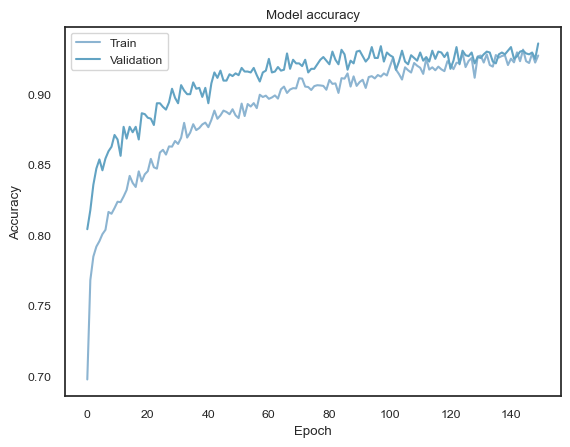

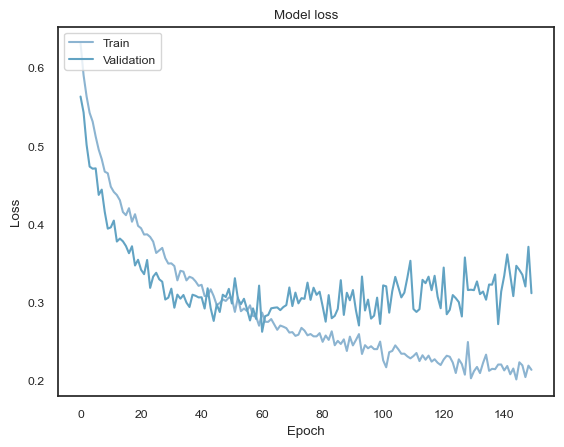

In [44]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [45]:
#evaluate with evaluation matrics
y_pred = model.predict(X_test)

# Convert probabilities to class labels (assuming binary classification)
y_pred_classes = (y_pred > 0.5).astype(int)

# Generate classification report
print(classification_report(y_test, y_pred_classes))

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       976
           1       0.90      0.92      0.91       968

    accuracy                           0.91      1944
   macro avg       0.91      0.91      0.91      1944
weighted avg       0.91      0.91      0.91      1944



<h5> Model 2 - 5 hidden layers /150 epochs / 32 batch size

In [65]:
# Define the neural network architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
     Dense(32, activation='relu'),
     Dropout(0.2),  # Adding 20% dropout
    Dense(16, activation='relu'),
     Dropout(0.2),  # Adding 20% dropout
    Dense(8, activation='relu'),
     Dropout(0.2),  # Adding 20% dropout
    Dense(4, activation='relu'),
     Dropout(0.2),  # Adding 20% dropout

    Dense(1, activation='sigmoid')
])


# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.2)


# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(X_test, y_test)

print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
195/195 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5804 - loss: 0.6543 - val_accuracy: 0.8085 - val_loss: 0.4579
Epoch 2/150
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7403 - loss: 0.5268 - val_accuracy: 0.8290 - val_loss: 0.4282
Epoch 3/150
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7730 - loss: 0.5008 - val_accuracy: 0.8406 - val_loss: 0.3895
Epoch 4/150
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7878 - loss: 0.4720 - val_accuracy: 0.8458 - val_loss: 0.3724
Epoch 5/150
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7960 - loss: 0.4468 - val_accuracy: 0.8515 - val_loss: 0.3664
Epoch 6/150
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8130 - loss: 0.4249 - val_accuracy: 0.8490 - val_loss: 0.3457
Epoch 7/150
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8219 - loss: 0.3997 - val_accuracy: 0.8612 - val_loss: 0.3299
Epoch 8/150
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8222 - loss: 0.4017 - val_accu

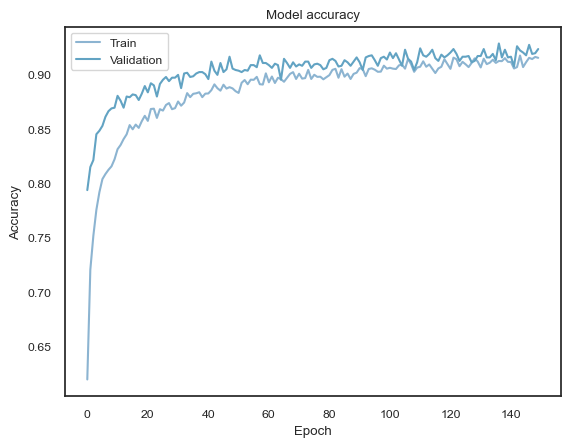

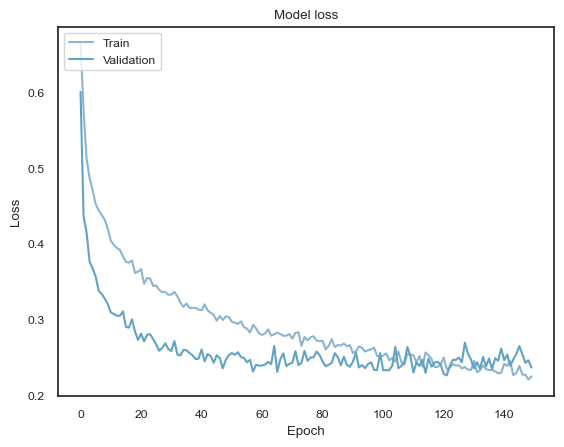

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.93      0.88      0.91       976
           1       0.89      0.94      0.91       968

    accuracy                           0.91      1944
   macro avg       0.91      0.91      0.91      1944
weighted avg       0.91      0.91      0.91      1944



In [48]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Assuming you've trained your model and made predictions on the test set
y_pred = model.predict(X_test)

# Convert probabilities to class labels (assuming binary classification)
y_pred_classes = (y_pred > 0.5).astype(int)

# Generate classification report
print(classification_report(y_test, y_pred_classes))



<h5> Model 3 - 3 hidden layers /150 epochs / 32 batch size

In [50]:

# Define the neural network architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),  # Adding 20% dropout
     Dense(32, activation='relu'),
     Dropout(0.2),  # Adding 20% dropout
     Dense(16, activation='relu'),
     Dropout(0.2),  # Adding 20% dropout
    Dense(1, activation='sigmoid')
])


# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.2)


# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(X_test, y_test)

print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

Epoch 1/150


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


195/195 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6356 - loss: 0.6246 - val_accuracy: 0.8040 - val_loss: 0.4242
Epoch 2/150
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7771 - loss: 0.4875 - val_accuracy: 0.8201 - val_loss: 0.3960
Epoch 3/150
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7818 - loss: 0.4661 - val_accuracy: 0.8310 - val_loss: 0.3827
Epoch 4/150
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8021 - loss: 0.4412 - val_accuracy: 0.8503 - val_loss: 0.3720
Epoch 5/150
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8007 - loss: 0.4419 - val_accuracy: 0.8496 - val_loss: 0.3621
Epoch 6/150
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8077 - loss: 0.4183 - val_accuracy: 0.8528 - val_loss: 0.3513
Epoch 7/150
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8281 - loss: 0.3958 - val_accuracy: 0.8573 - val_loss: 0.3505
Epoch 8/150
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8325 - loss: 0.3965 - val_accuracy: 0.8586

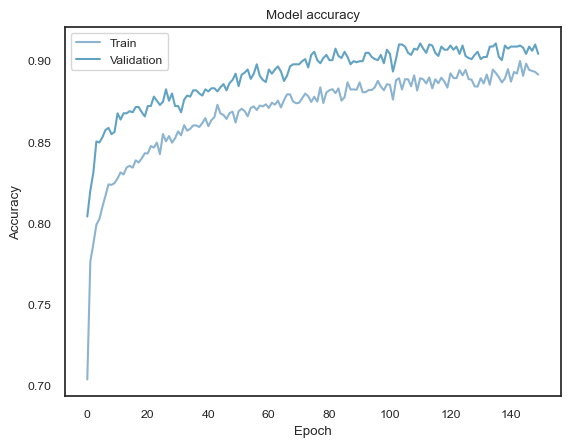

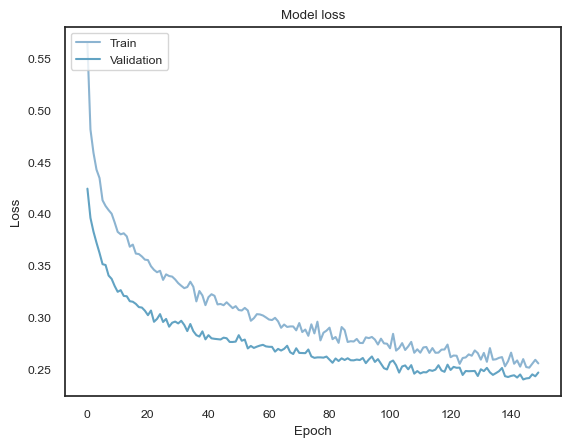

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.94      0.85      0.90       976
           1       0.87      0.95      0.91       968

    accuracy                           0.90      1944
   macro avg       0.90      0.90      0.90      1944
weighted avg       0.91      0.90      0.90      1944



In [51]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Assuming you've trained your model and made predictions on the test set
y_pred = model.predict(X_test)

# Convert probabilities to class labels (assuming binary classification)
y_pred_classes = (y_pred > 0.5).astype(int)

# Generate classification report
print(classification_report(y_test, y_pred_classes))



<h5> Model 4 - 1 hidden layers /150 epochs / 32 batch size

In [52]:

# Define the neural network architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),  # Adding 20% dropout
    Dense(1, activation='sigmoid')
])


# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.2)


# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(X_test, y_test)

print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

Epoch 1/150


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6092 - loss: 0.6565 - val_accuracy: 0.7918 - val_loss: 0.4617
Epoch 2/150
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - accuracy: 0.7774 - loss: 0.4906 - val_accuracy: 0.8078 - val_loss: 0.4173
Epoch 3/150
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - accuracy: 0.7776 - loss: 0.4665 - val_accuracy: 0.8156 - val_loss: 0.4035
Epoch 4/150
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - accuracy: 0.7983 - loss: 0.4385 - val_accuracy: 0.8207 - val_loss: 0.3939
Epoch 5/150
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - accuracy: 0.7936 - loss: 0.4365 - val_accuracy: 0.8258 - val_loss: 0.3870
Epoch 6/150
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - accuracy: 0.7988 - loss: 0.4288 - val_accuracy: 0.8316 - val_loss: 0.3849
Epoch 7/150
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - accuracy: 0.8134 - loss: 0.4165 - val_accuracy: 0.8361 - val_loss: 0.3797
Epoch 8/150
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step - accuracy: 0.7999 - loss: 0.4272 - val_ac

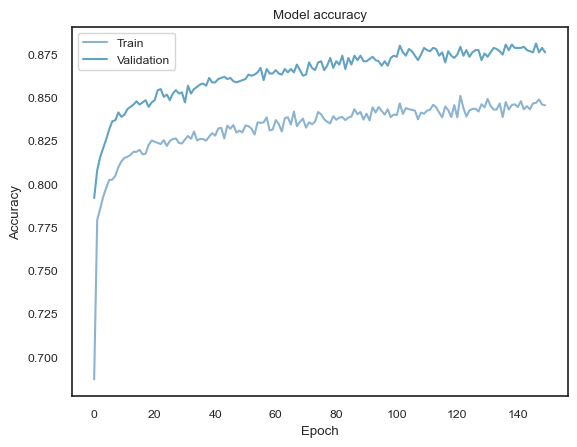

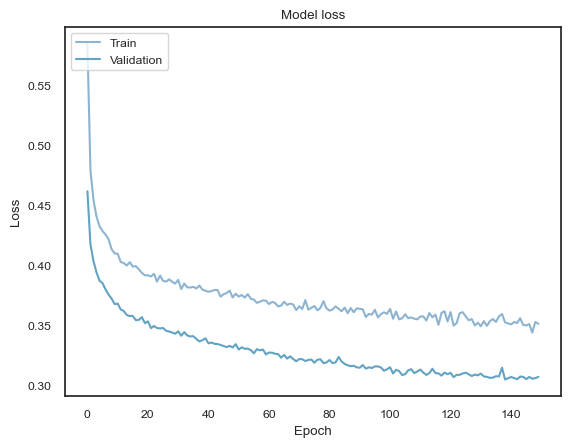

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.90      0.79      0.84       976
           1       0.81      0.91      0.86       968

    accuracy                           0.85      1944
   macro avg       0.85      0.85      0.85      1944
weighted avg       0.85      0.85      0.85      1944



In [53]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Assuming you've trained your model and made predictions on the test set
y_pred = model.predict(X_test)

# Convert probabilities to class labels (assuming binary classification)
y_pred_classes = (y_pred > 0.5).astype(int)

# Generate classification report
print(classification_report(y_test, y_pred_classes))



<h5> Model 1 - 7 hidden layers /200 epochs / 64 batch size

In [55]:
# Define the neural network architecture
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),  # Adding 20% dropout
     Dense(128, activation='relu'),
    Dropout(0.2),  # Adding 20% dropout
     Dense(64, activation='relu'),
    Dropout(0.2),  # Adding 20% dropout
     Dense(32, activation='relu'),
     Dropout(0.2),  # Adding 20% dropout
    Dense(16, activation='relu'),
     Dropout(0.2),  # Adding 20% dropout
    Dense(8, activation='relu'),
     Dropout(0.2),  # Adding 20% dropout
    Dense(4, activation='relu'),
     Dropout(0.2),  # Adding 20% dropout

    Dense(1, activation='sigmoid')
])


# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=64, validation_split=0.2)


# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(X_test, y_test)

print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

Epoch 1/200


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5605 - loss: 0.6683 - val_accuracy: 0.8072 - val_loss: 0.4621
Epoch 2/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7103 - loss: 0.5669 - val_accuracy: 0.8239 - val_loss: 0.4117
Epoch 3/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7611 - loss: 0.5152 - val_accuracy: 0.8278 - val_loss: 0.3969
Epoch 4/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7732 - loss: 0.4847 - val_accuracy: 0.8361 - val_loss: 0.3869
Epoch 5/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7839 - loss: 0.4772 - val_accuracy: 0.8335 - val_loss: 0.3798
Epoch 6/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8015 - loss: 0.4421 - val_accuracy: 0.8573 - val_loss: 0.3669
Epoch 7/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8195 - loss: 0.4337 - val_accuracy: 0.8451 - val_loss: 0.3567
Epoch 8/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8176 - loss: 0.4187 - val_accuracy: 0.8612 - val_loss: 0.3

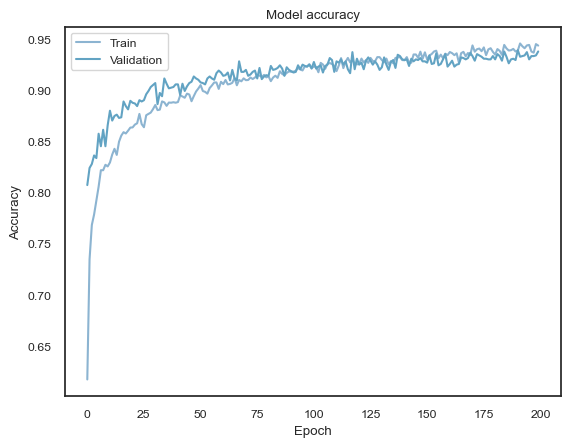

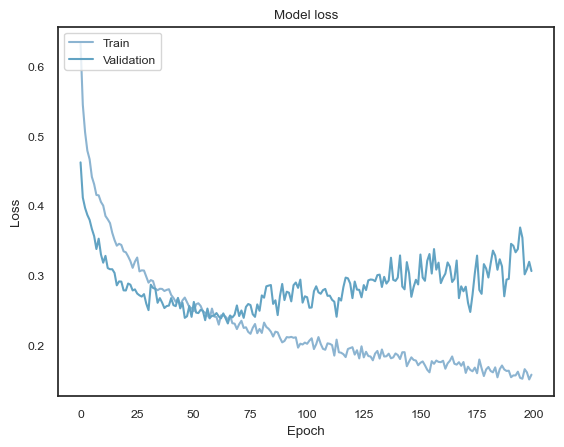

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.96      0.87      0.92       976
           1       0.88      0.97      0.92       968

    accuracy                           0.92      1944
   macro avg       0.92      0.92      0.92      1944
weighted avg       0.92      0.92      0.92      1944



In [56]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Assuming you've trained your model and made predictions on the test set
y_pred = model.predict(X_test)

# Convert probabilities to class labels (assuming binary classification)
y_pred_classes = (y_pred > 0.5).astype(int)

# Generate classification report
print(classification_report(y_test, y_pred_classes))



<h5> Model 2 - 5 hidden layers /200 epochs / 64 batch size

In [57]:
# Define the neural network architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)), 
     Dense(32, activation='relu'),
     Dropout(0.2),  # Adding 20% dropout
    Dense(16, activation='relu'),
     Dropout(0.2),  # Adding 20% dropout
    Dense(8, activation='relu'),
     Dropout(0.2),  # Adding 20% dropout
    Dense(4, activation='relu'),
     Dropout(0.2),  # Adding 20% dropout
    Dense(1, activation='sigmoid')
])


# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=64, validation_split=0.2)


# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(X_test, y_test)

print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

Epoch 1/200


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5324 - loss: 0.6862 - val_accuracy: 0.7783 - val_loss: 0.6153
Epoch 2/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6935 - loss: 0.6319 - val_accuracy: 0.7976 - val_loss: 0.4902
Epoch 3/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7428 - loss: 0.5310 - val_accuracy: 0.8213 - val_loss: 0.4177
Epoch 4/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7746 - loss: 0.5073 - val_accuracy: 0.8387 - val_loss: 0.3994
Epoch 5/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8040 - loss: 0.4746 - val_accuracy: 0.8393 - val_loss: 0.3841
Epoch 6/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8121 - loss: 0.4665 - val_accuracy: 0.8515 - val_loss: 0.3732
Epoch 7/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8199 - loss: 0.4571 - val_accuracy: 0.8541 - val_loss: 0.3665
Epoch 8/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8231 - loss: 0.4498 - val_accuracy: 0.8470 - val_loss: 0.3

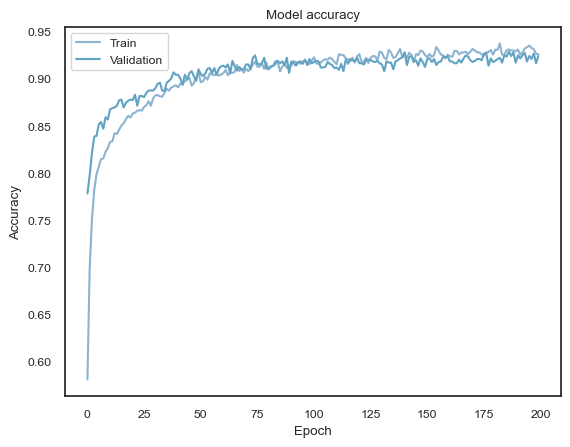

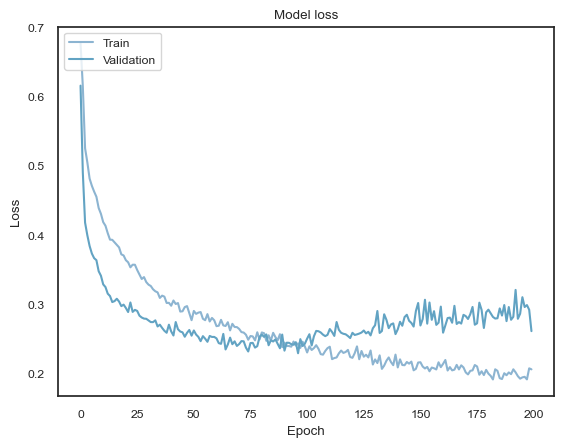

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       976
           1       0.89      0.94      0.91       968

    accuracy                           0.91      1944
   macro avg       0.91      0.91      0.91      1944
weighted avg       0.91      0.91      0.91      1944



In [58]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Assuming you've trained your model and made predictions on the test set
y_pred = model.predict(X_test)

# Convert probabilities to class labels (assuming binary classification)
y_pred_classes = (y_pred > 0.5).astype(int)

# Generate classification report
print(classification_report(y_test, y_pred_classes))



<h5> Model 3 - 3 hidden layers /200 epochs / 64 batch size

In [59]:
# Define the neural network architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)), 
     Dense(32, activation='relu'),
     Dropout(0.2),  # Adding 20% dropout
    Dense(16, activation='relu'),
     Dropout(0.2),  # Adding 20% dropout
    
    Dense(1, activation='sigmoid')
])


# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=64, validation_split=0.2)


# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(X_test, y_test)

print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

Epoch 1/200


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5924 - loss: 0.6690 - val_accuracy: 0.7815 - val_loss: 0.4603
Epoch 2/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7645 - loss: 0.5014 - val_accuracy: 0.8123 - val_loss: 0.4041
Epoch 3/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7873 - loss: 0.4637 - val_accuracy: 0.8233 - val_loss: 0.3876
Epoch 4/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7949 - loss: 0.4452 - val_accuracy: 0.8432 - val_loss: 0.3765
Epoch 5/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8127 - loss: 0.4162 - val_accuracy: 0.8445 - val_loss: 0.3611
Epoch 6/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8227 - loss: 0.3967 - val_accuracy: 0.8515 - val_loss: 0.3499
Epoch 7/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8201 - loss: 0.3992 - val_accuracy: 0.8580 - val_loss: 0.3368
Epoch 8/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8370 - loss: 0.3812 - val_accuracy: 0.8618 - val_loss: 0.3

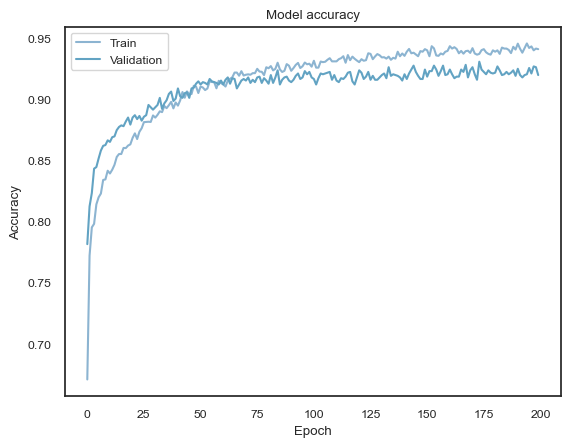

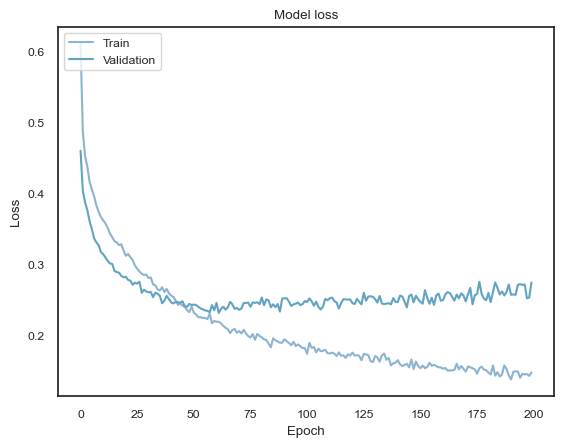

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.96      0.88      0.92       976
           1       0.89      0.96      0.92       968

    accuracy                           0.92      1944
   macro avg       0.92      0.92      0.92      1944
weighted avg       0.92      0.92      0.92      1944



In [60]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Assuming you've trained your model and made predictions on the test set
y_pred = model.predict(X_test)

# Convert probabilities to class labels (assuming binary classification)
y_pred_classes = (y_pred > 0.5).astype(int)

# Generate classification report
print(classification_report(y_test, y_pred_classes))



<h5> Model 4 - 1 hidden layers /200 epochs / 64 batch size

In [61]:
# Define the neural network architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)), 
       Dropout(0.2),  # Adding 20% dropout
    
    Dense(1, activation='sigmoid')
])


# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=64, validation_split=0.2)


# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(X_test, y_test)

print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

Epoch 1/200


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5896 - loss: 0.6627 - val_accuracy: 0.7828 - val_loss: 0.5141
Epoch 2/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7494 - loss: 0.5282 - val_accuracy: 0.7982 - val_loss: 0.4468
Epoch 3/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7773 - loss: 0.4772 - val_accuracy: 0.8130 - val_loss: 0.4173
Epoch 4/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7775 - loss: 0.4651 - val_accuracy: 0.8188 - val_loss: 0.4028
Epoch 5/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7972 - loss: 0.4393 - val_accuracy: 0.8252 - val_loss: 0.3958
Epoch 6/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8005 - loss: 0.4325 - val_accuracy: 0.8290 - val_loss: 0.3912
Epoch 7/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8001 - loss: 0.4292 - val_accuracy: 0.8316 - val_loss: 0.3854
Epoch 8/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8010 - loss: 0.4268 - val_accuracy: 0.8310 - val_loss: 0.3

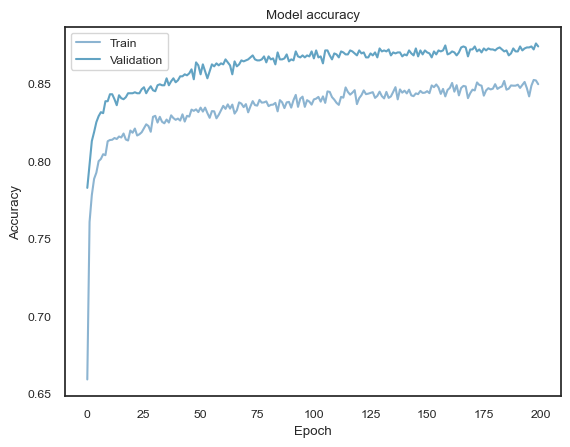

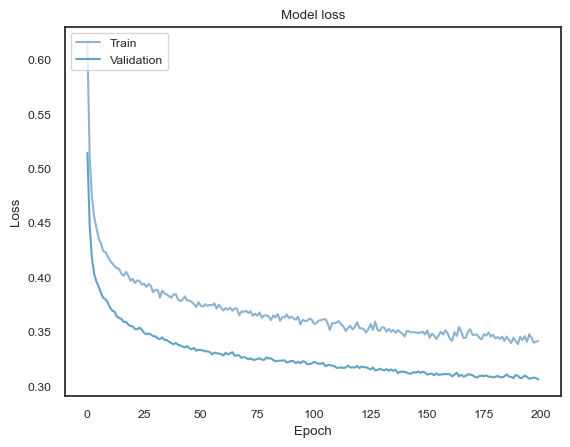

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step
              precision    recall  f1-score   support

           0       0.89      0.79      0.84       976
           1       0.81      0.90      0.86       968

    accuracy                           0.85      1944
   macro avg       0.85      0.85      0.85      1944
weighted avg       0.85      0.85      0.85      1944



In [62]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Assuming you've trained your model and made predictions on the test set
y_pred = model.predict(X_test)

# Convert probabilities to class labels (assuming binary classification)
y_pred_classes = (y_pred > 0.5).astype(int)

# Generate classification report
print(classification_report(y_test, y_pred_classes))



In [66]:
# Print model summary to inspect architecture
model.summary()


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_46 (Dense)                     │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_34 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_48 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_35 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_36 (Dropout)                 │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_37 (Dropout)                 │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,661 (41.65 KB)

 Trainable params: 3,553 (13.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,108 (27.77 KB)

<h1>XAI - Evaluation

<h2> Explanation of LIME - Local explanation

In [68]:
processed_df.iloc[1]

age                  0.785889
hypertension         0.000000
heart_disease        0.000000
ever_married         1.000000
work_type            3.000000
Residence_type       0.000000
avg_glucose_level    1.542903
bmi                  0.005806
smoking_status       2.000000
stroke               1.000000
gender_Female        1.000000
gender_Male          0.000000
Name: 1, dtype: float64

In [69]:
np.array(processed_df)

array([[ 1.05124201,  0.        ,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       [ 0.78588869,  0.        ,  0.        , ...,  1.        ,
         1.        ,  0.        ],
       [ 1.6261742 ,  0.        ,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [-0.3639757 ,  0.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.34363316,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.03405428,  0.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ]])

In [70]:
print(processed_df.shape)


(5109, 12)


In [71]:
# Using LIME for explanation
explainer = LimeTabularExplainer(X_train, mode='classification', 
                                 feature_names=processed_df.columns.tolist(), class_names=['No Stroke', 'Stroke'])

sample_idx = 45  # index from the test set

# Define a prediction function that returns the probabilities for both classes
prediction_fn = lambda x: np.column_stack([1 - model.predict(x), model.predict(x)])  # Stacking probabilities for both classes
explanation = explainer.explain_instance(X_test[sample_idx], prediction_fn,num_features=5)

# Display the explanation
explanation.show_in_notebook()





157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step


In [72]:
explanation.as_list()

[('gender_Female <= -0.84', 0.12011659259767048),
 ('-1.14 < stroke <= 0.87', -0.086573680471496),
 ('0.23 < age <= 0.86', 0.07319203237823593),
 ('bmi > 0.46', -0.06998616774012302),
 ('work_type > -0.04', -0.06937195504794562)]

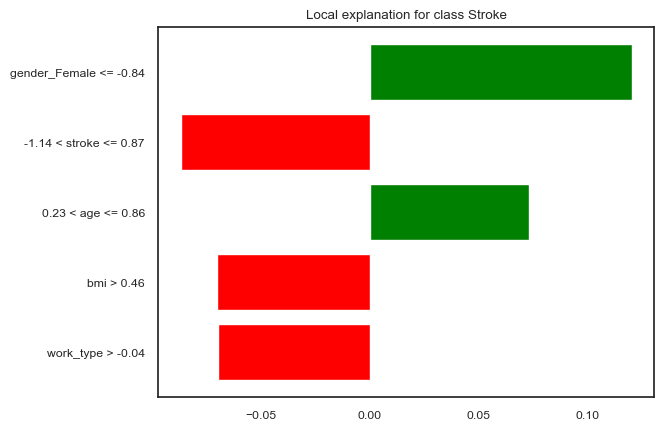

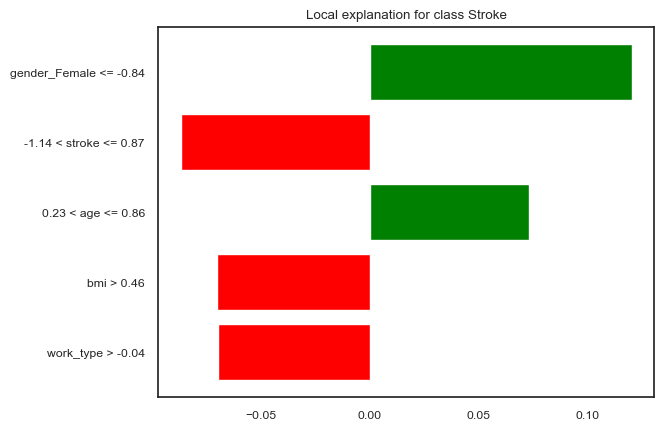

In [73]:
explanation.as_pyplot_figure()

In [74]:
# Using LIME for explanation
explainer = LimeTabularExplainer(X_train, mode='classification', 
                                 feature_names=processed_df.columns.tolist(), class_names=['No Stroke', 'Stroke'])

sample_idx = 0  #  index from the test set

# Define a prediction function that returns the probabilities for both classes
prediction_fn = lambda x: np.column_stack([1 - model.predict(x), model.predict(x)])  # Stacking probabilities for both classes
explanation = explainer.explain_instance(X_test[sample_idx], prediction_fn,num_features=5)

# Display the explanation
explanation.show_in_notebook()


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step


<h2>Global Explanation of SHAP

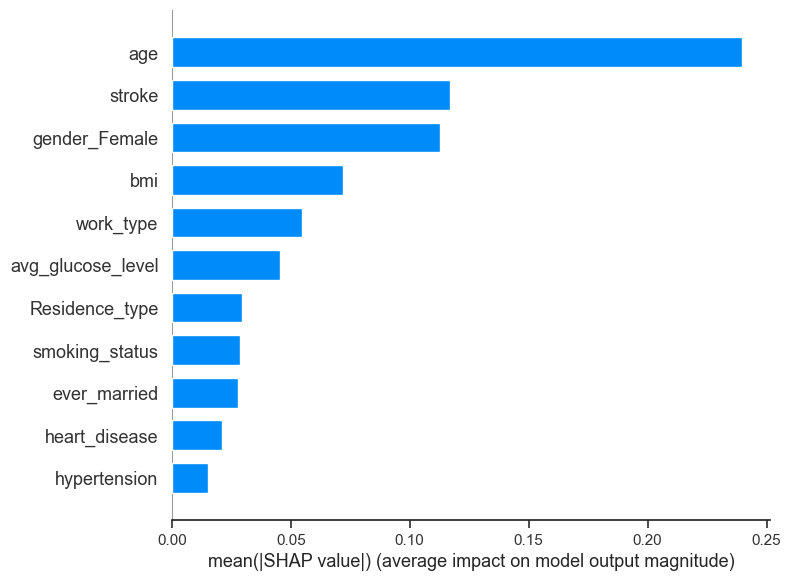

In [158]:

# Extracting feature names
feature_names = processed_df.columns.tolist()

# Plot the summary plot for variable importance
shap.summary_plot(shap_values, X_train, plot_type='bar', feature_names=feature_names)

plt.show()

PermutationExplainer explainer: 1945it [00:51, 32.45it/s]                                                              


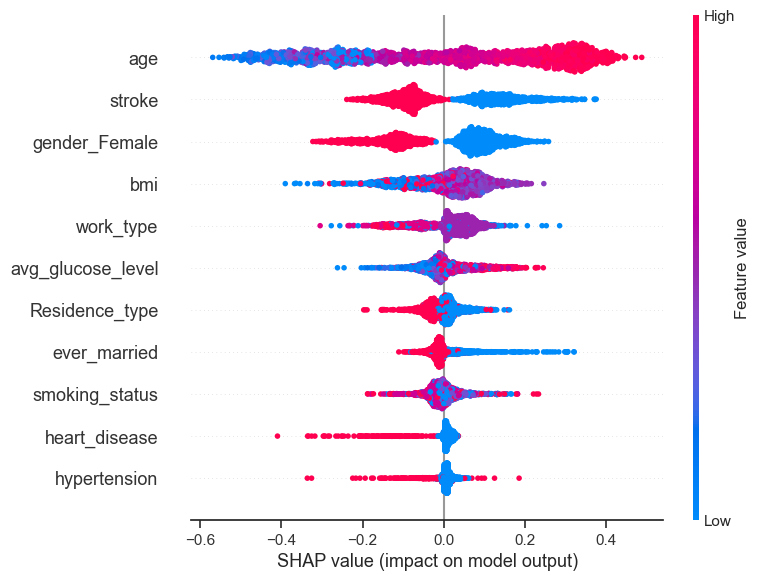

In [55]:
# Assuming model is your trained model and X_test is your test data
explainer = shap.Explainer(model, X_train)
shap_values = explainer.shap_values(X_test)

# Summarize the effects of all the features
shap.summary_plot(shap_values, X_test, feature_names=processed_df.columns.tolist())


In [56]:
model

<Sequential name=sequential, built=True>

In [57]:
print("Size of SHAP values array:", shap_values.shape)
print("Number of feature names:", len(processed_df.columns))


Size of SHAP values array: (1944, 11)
Number of feature names: 12


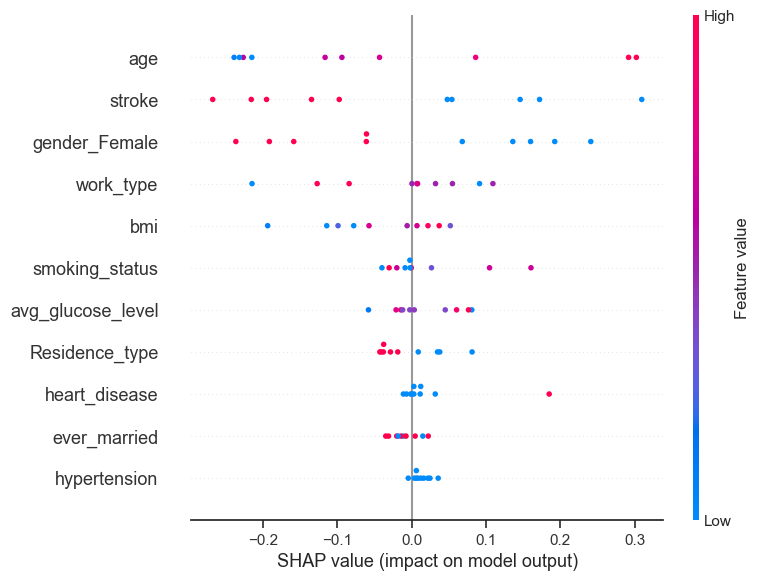

In [79]:

# Create a SHAP explainer
explainer = shap.Explainer(model, X_train)

# Compute SHAP values for a subset of your test or train data
subset_idx = [0, 1, 2, 3, 4,5,6,7,8,9]  # Choose indices for the subset
shap_values = explainer.shap_values(X_test[subset_idx])

# Summarize the effects of all the features for the subset
shap.summary_plot(shap_values, X_test[subset_idx], feature_names=processed_df.columns.tolist())


In [80]:
print(type(model))


<class 'keras.src.models.sequential.Sequential'>


In [81]:
print(model.output_shape)


(None, 1)


In [82]:
shap_values

array([[-2.38904010e-01,  6.33592785e-03, -6.89766869e-03,
        -1.10808801e-02,  4.58360129e-04, -4.08793530e-02,
        -1.45149074e-02, -1.14214771e-01, -8.77338281e-03,
        -9.74182736e-02,  6.81953394e-02],
       [-2.26557494e-01,  1.23613767e-02, -1.10878208e-02,
        -1.43483046e-02,  7.23843285e-03, -4.27387508e-02,
        -2.09259316e-02, -5.73540170e-02, -3.99351884e-02,
         1.72180106e-01, -2.36526028e-01],
       [-9.38054088e-02,  6.38552041e-03,  2.98796526e-03,
        -7.57074682e-03, -2.14725413e-01,  8.90337584e-03,
        -2.46081245e-03, -6.01212081e-03, -1.99291518e-02,
        -2.67654513e-01,  1.36190715e-01],
       [-2.31796114e-01,  3.80548023e-03,  1.69638359e-04,
         1.50596124e-02, -1.27121792e-01, -1.86627846e-02,
        -1.20666550e-02, -7.79179887e-02, -2.35364042e-03,
         5.41445411e-02, -6.09539178e-02],
       [ 3.02422242e-01,  3.57588929e-02,  1.22732718e-02,
        -3.47872899e-02,  7.96624785e-03,  3.78866509e-02,
  

Shap Force Plot for individual instance

In [ ]:
shap.initjs()

explainer = shap.Explainer(model, X_train)

feature_names = processed_df.columns[:-1].tolist()

shap.force_plot(expected_value, shap_values[0,:]  ,X_test[0,:],feature_names=feature_names)

In [89]:
print(len(shap_values))

10


In [90]:
shap_values[0].shape

(11,)

<h2>Permuation | Importance

In [159]:
# Compute baseline accuracy
y_pred_baseline = model.predict(X_test)
baseline_accuracy = accuracy_score(y_test, y_pred_baseline.round())

# Initialize lists to store feature importance scores
feature_importance_scores = []

# Iterate over each feature
for feature_idx in range(X_test.shape[1]):
    # Create a copy of the original test data
    X_test_permuted = copy.deepcopy(X_test)
    # Permute feature values
    X_test_permuted[:, feature_idx] = np.random.permutation(X_test[:, feature_idx])
    
    # Predict using the model with permuted feature
    y_pred_permuted = model.predict(X_test_permuted)
    # Compute accuracy with permuted feature
    permuted_accuracy = accuracy_score(y_test, y_pred_permuted.round())
    
    # Calculate importance score as decrease in accuracy
    importance_score = baseline_accuracy - permuted_accuracy
    
    # Append importance score to list
    feature_importance_scores.append(importance_score)

# Rank features based on importance scores
sorted_feature_indices = np.argsort(feature_importance_scores)[::-1]
sorted_features = [feature_names[i] for i in sorted_feature_indices]

# Print ranked list of features and their importance scores
for i, feature in enumerate(sorted_features):
    print(f"Feature #{i+1}: {feature} - Importance Score: {feature_importance_scores[sorted_feature_indices[i]]}")


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step
Feature #1: age - Importance Score: 0.30092592592592593
Feature #2: bmi - Importance Score: 0.12088477366255146
Feature #3: avg_glucose_level - Importance Score: 0.10442386831275718
Feature #4: stroke - Importance Score: 0.08179012345679015
Feature #5: gender_Female - Importance Score: 0.07870370370370372
Feature #6: work_type - Importance Score: 0.0761316872427984
Feature #7: smoking_status - Importance Score: 0.06841563786008231
Feature #8: Residence_type - Importance Score: 0.044238683127572065
Featu

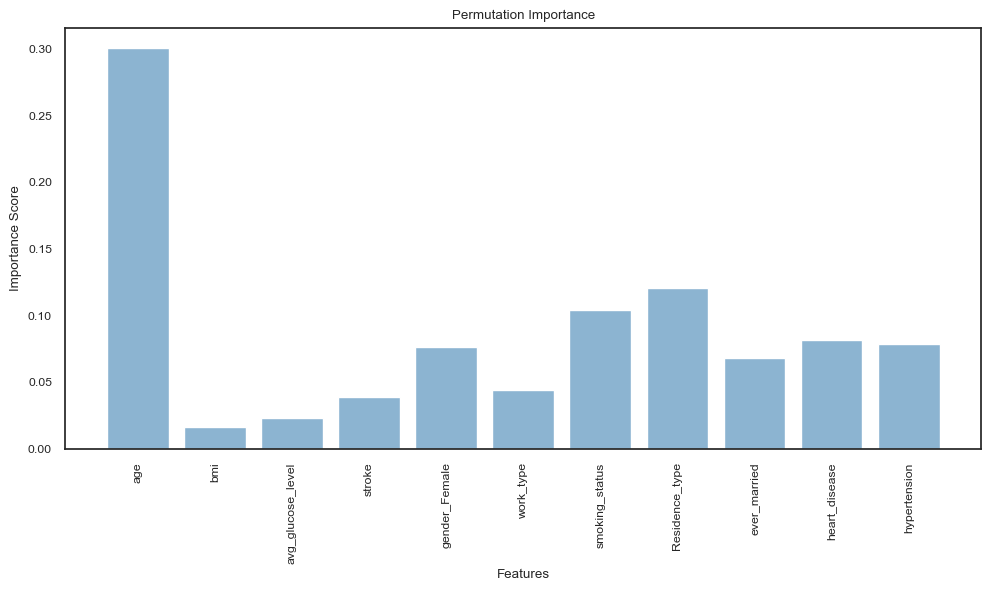

In [160]:
import matplotlib.pyplot as plt

# Plot feature importance scores
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_features)), feature_importance_scores, align='center')
plt.xticks(range(len(sorted_features)), sorted_features, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Permutation Importance')
plt.tight_layout()
plt.show()
